In [49]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import collections
import random
import math
from pylab import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from torch.utils.data import Dataset, DataLoader
torch.set_default_tensor_type('torch.FloatTensor')
import torch.autograd as autograd


In [50]:
dataset = pd.read_excel("all_set.xlsx")
inputs_indx = ["frequency","angle_of_attack", "chord_lenght", "free-streem_velocity", "suction_side"]
label_indx = ["sound_pressure"]
print(len(dataset))
dataset.drop_duplicates()
print(len(dataset))
dataset['frequency']

1503
1503


0         800
1        1000
2        1250
3        1600
4        2000
5        2500
6        3150
7        4000
8        5000
9        6300
10       8000
11      10000
12      12500
13      16000
14        500
15        630
16        800
17       1000
18       1250
19       1600
20       2000
21       2500
22       3150
23       4000
24       5000
25       6300
26       8000
27      10000
28      12500
29        200
        ...  
1473      200
1474      250
1475      315
1476      400
1477      500
1478      630
1479      800
1480     1000
1481     1250
1482     1600
1483     2000
1484     2500
1485     3150
1486     4000
1487      200
1488      250
1489      315
1490      400
1491      500
1492      630
1493      800
1494     1000
1495     1250
1496     1600
1497     2000
1498     2500
1499     3150
1500     4000
1501     5000
1502     6300
Name: frequency, Length: 1503, dtype: int64

1503


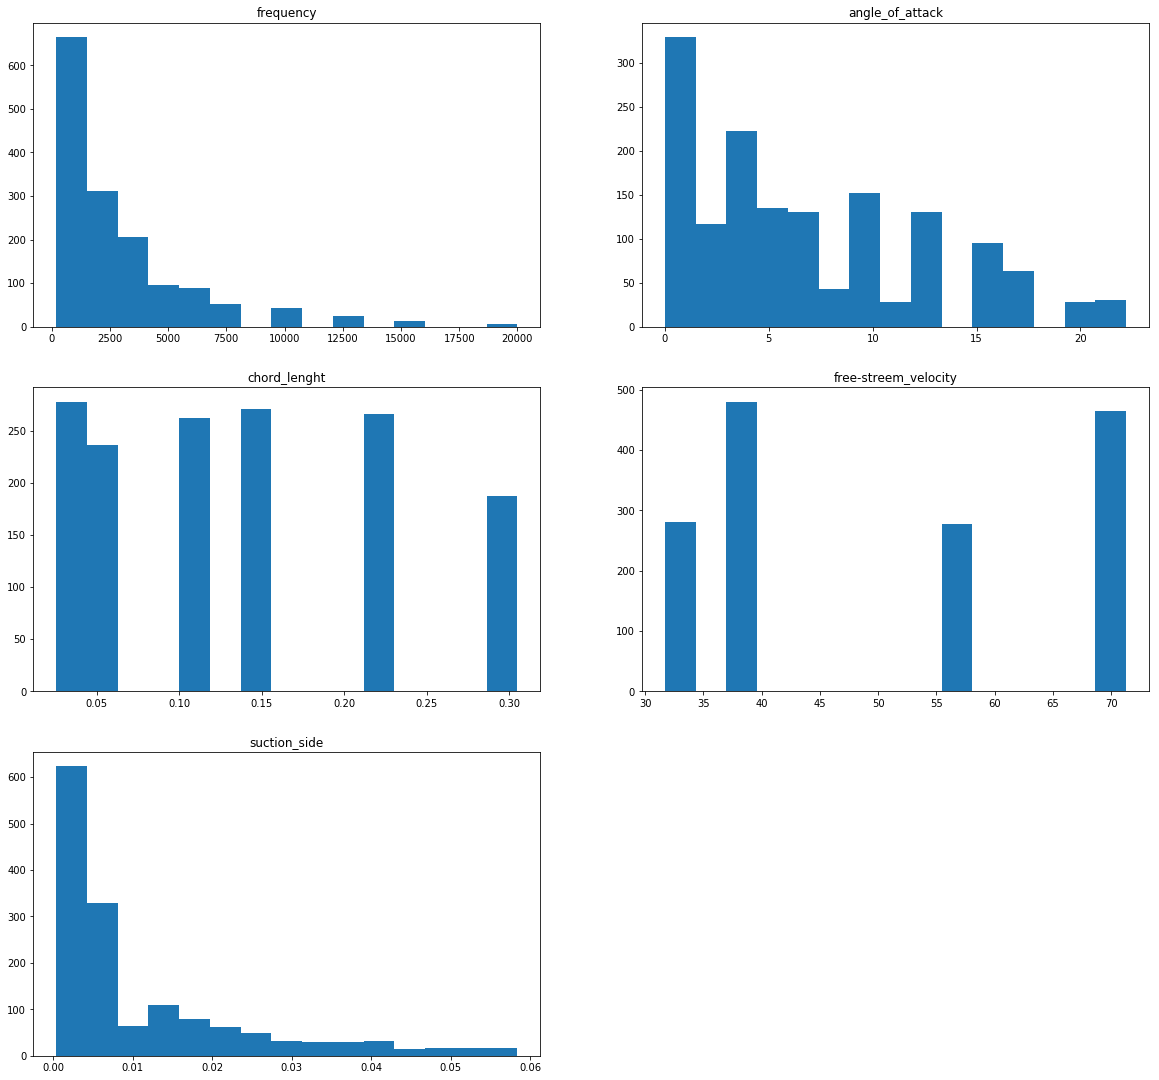

In [51]:
print(len(dataset))
plt.figure(figsize = (20, 19))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(dataset[inputs_indx[i]], bins = 15)
    plt.title(inputs_indx[i])
plt.savefig('hist1.png', bbox_inches='tight')


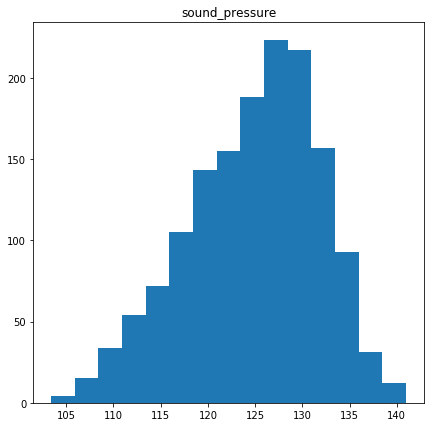

In [40]:
plt.figure(figsize = (7, 7))
plt.hist(dataset[label_indx[0]], bins = 15)
plt.title(label_indx[0])
plt.savefig('hist2.png', bbox_inches='tight')

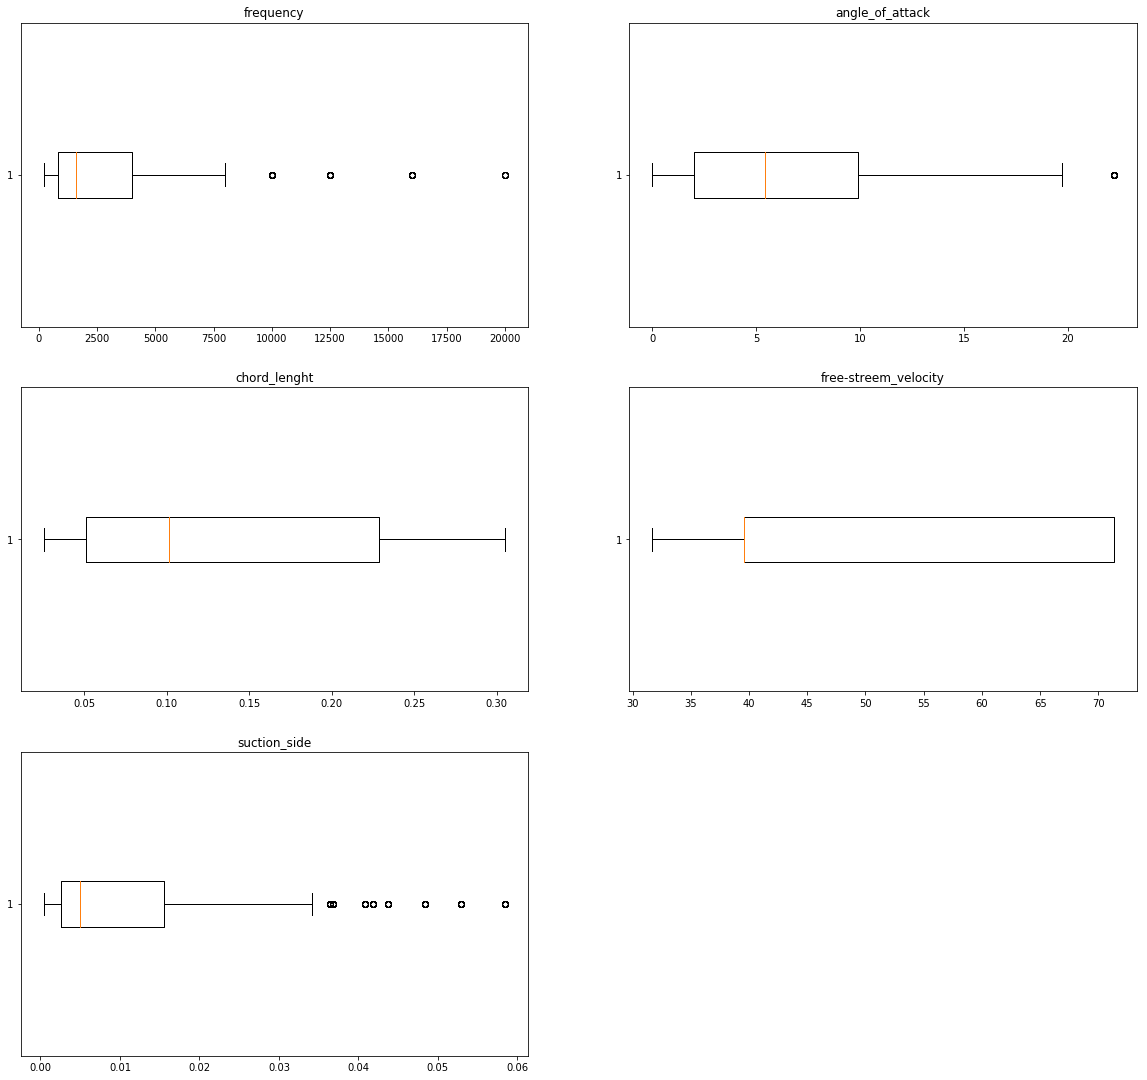

In [41]:
plt.figure(figsize = (20, 19))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.boxplot(dataset[inputs_indx[i]], vert=False)
    plt.title(inputs_indx[i])
plt.savefig('box1.png', bbox_inches='tight')

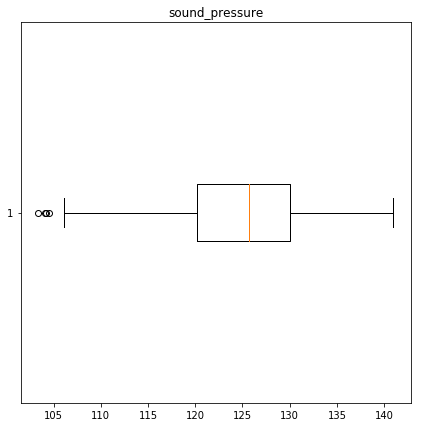

In [42]:
plt.figure(figsize = (7, 7))
plt.boxplot(dataset[label_indx[0]], vert=False)
plt.title(label_indx[0])
plt.savefig('box2.png', bbox_inches='tight')

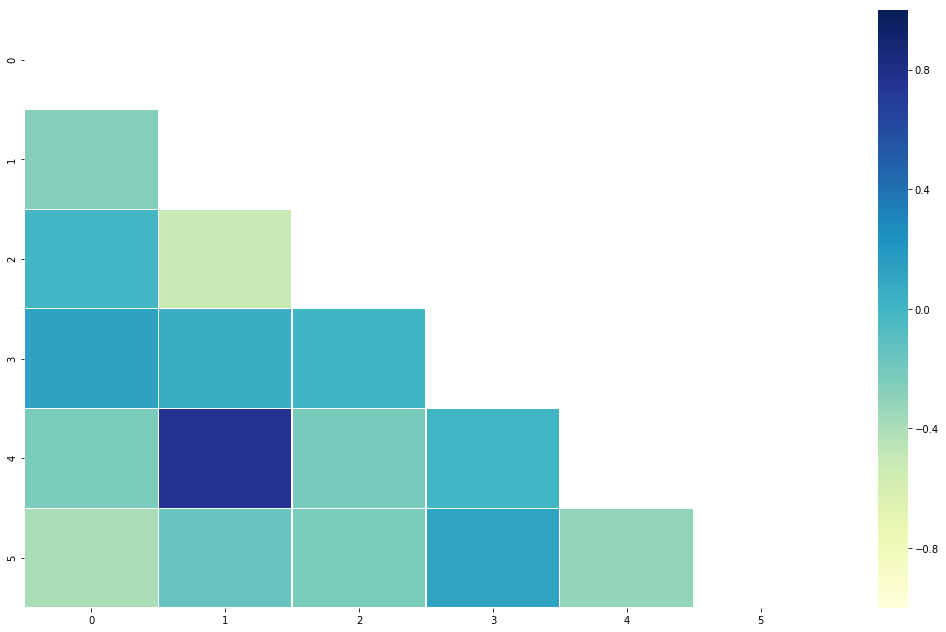

In [43]:
corr_of_dataset = np.array(dataset.corr())

plt.figure(figsize=(18,11)) 
mask = np.zeros_like(corr_of_dataset) 
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask) 
plt.savefig('heat_corr.png', bbox_inches='tight')

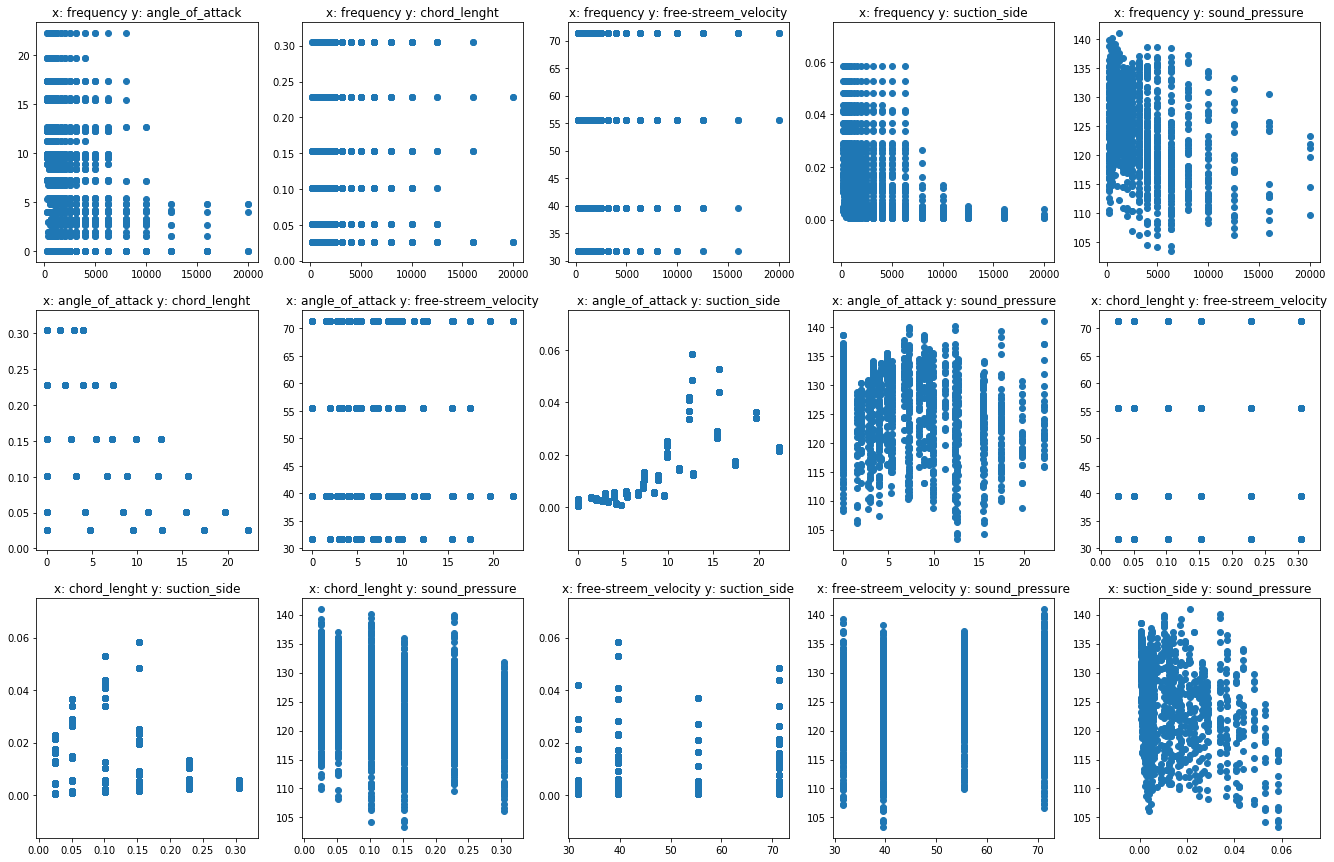

In [52]:
atr_to_scatter = [[inputs_indx[0], inputs_indx[1]], [inputs_indx[0], inputs_indx[2]],\
                  [inputs_indx[0], inputs_indx[3]],[inputs_indx[0], inputs_indx[4]],\
                  [inputs_indx[0], label_indx[0]], [inputs_indx[1], inputs_indx[2]],\
                  [inputs_indx[1], inputs_indx[3]], [inputs_indx[1], inputs_indx[4]], [inputs_indx[1], label_indx[0]],\
                  [inputs_indx[2], inputs_indx[3]], [inputs_indx[2], inputs_indx[4]], [inputs_indx[2], label_indx[0]],\
                  [inputs_indx[3], inputs_indx[4]],[inputs_indx[3], label_indx[0]], [inputs_indx[4], label_indx[0]]] 
plt.figure(figsize=(23, 15)) 
for i in range(len(atr_to_scatter)): 
    plt.subplot(3, 5, i+1) 
    plt.scatter(dataset[atr_to_scatter[i][0]], dataset[atr_to_scatter[i][1]]) 
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1])) 
    plt.savefig('scatter_diag.png', bbox_inches='tight')

In [54]:
len(dataset)
pap1=np.percentile(dataset['frequency'], 95)
pap2=np.percentile(dataset['frequency'], 5)
prh1=np.percentile(dataset['suction_side'], 95)
prh2=np.percentile(dataset['suction_side'], 5)
length=len(dataset)
for i in range(length):
    if(dataset['frequency'][i] > pap1 or dataset['frequency'][i] < pap2):
        dataset=dataset.drop([i])
    else:
        if(dataset['suction_side'][i] > prh1 or dataset['suction_side'][i] < prh2):
            dataset=dataset.drop([i])        

KeyError: 12

In [55]:
len(dataset)

1306

1306


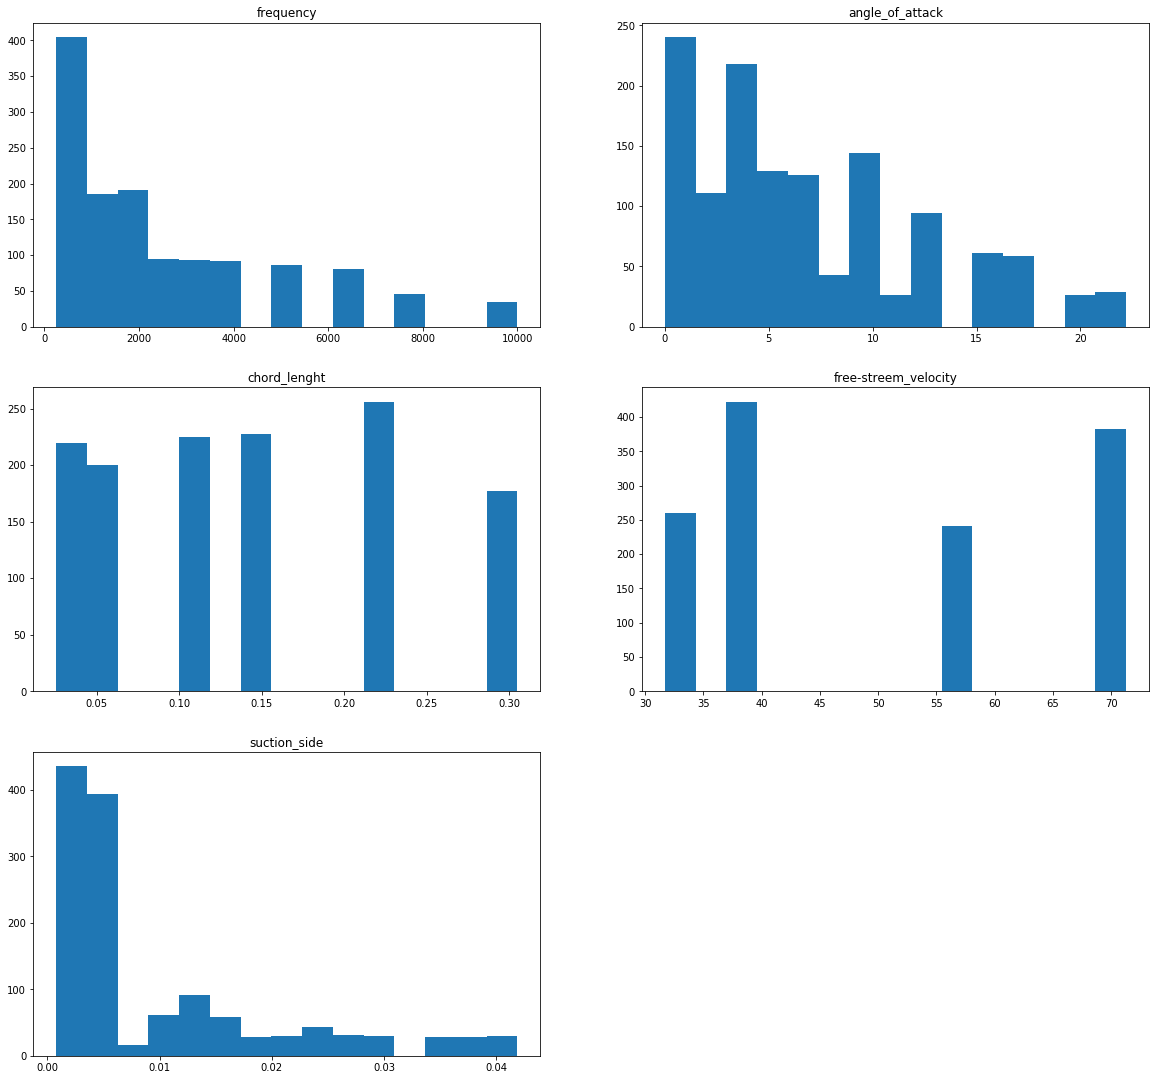

In [56]:
print(len(dataset))
plt.figure(figsize = (20, 19))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(dataset[inputs_indx[i]], bins = 15)
    plt.title(inputs_indx[i])

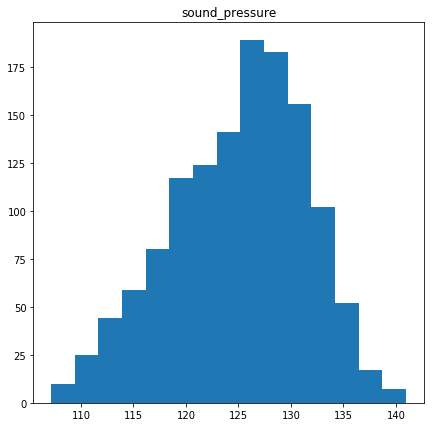

In [57]:
plt.figure(figsize = (7, 7))
plt.hist(dataset[label_indx[0]], bins = 15)
plt.title(label_indx[0])
plt.savefig('hist2.png', bbox_inches='tight')

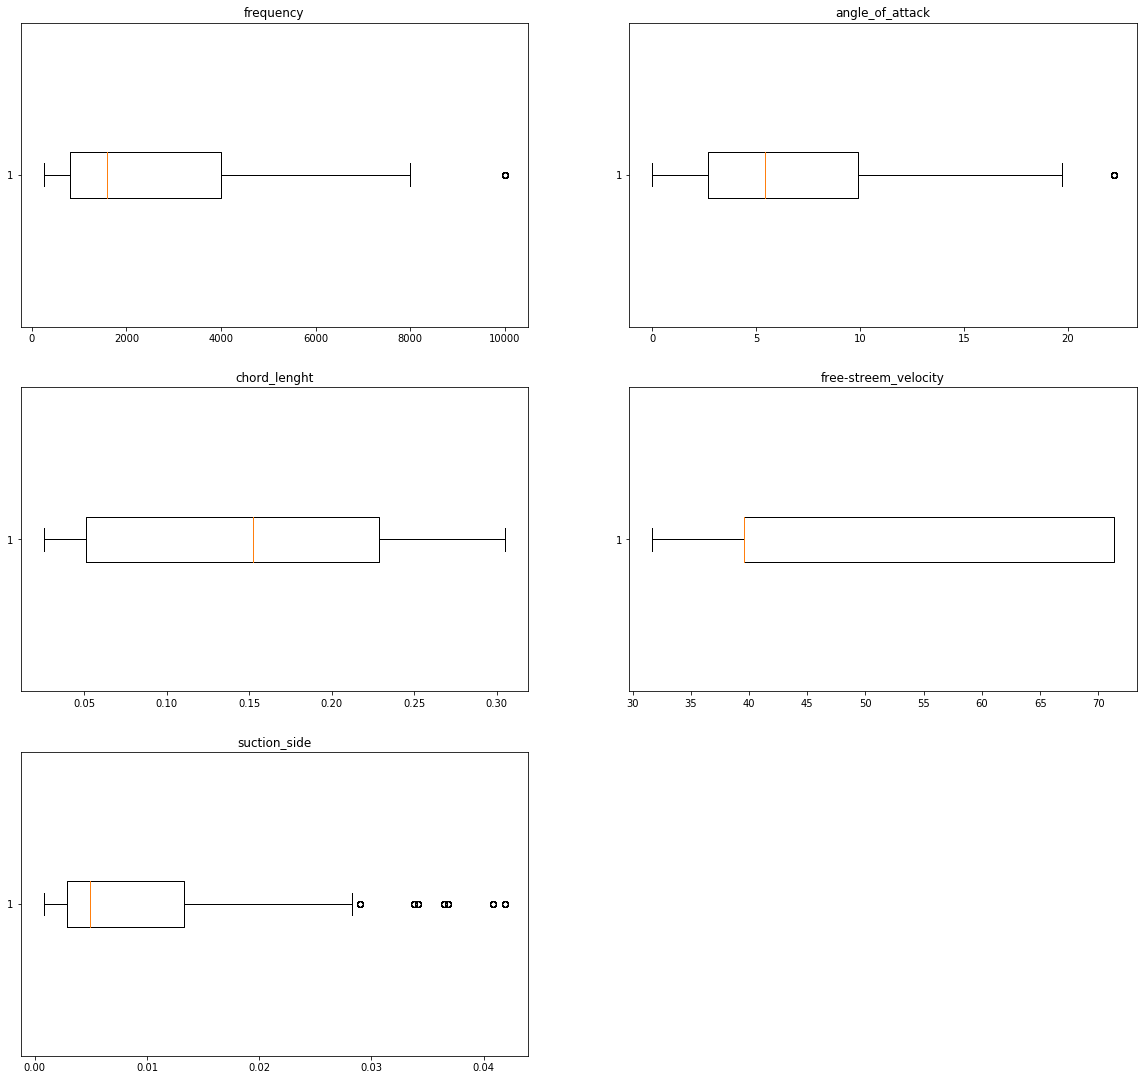

In [58]:
plt.figure(figsize = (20, 19))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.boxplot(dataset[inputs_indx[i]], vert=False)
    plt.title(inputs_indx[i])
plt.savefig('box1.png', bbox_inches='tight')

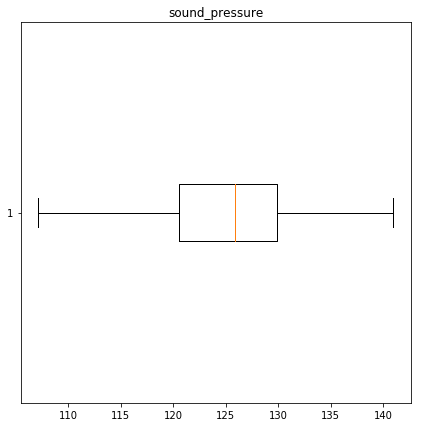

In [59]:
plt.figure(figsize = (7, 7))
plt.boxplot(dataset[label_indx[0]], vert=False)
plt.title(label_indx[0])
plt.savefig('box2.png', bbox_inches='tight')

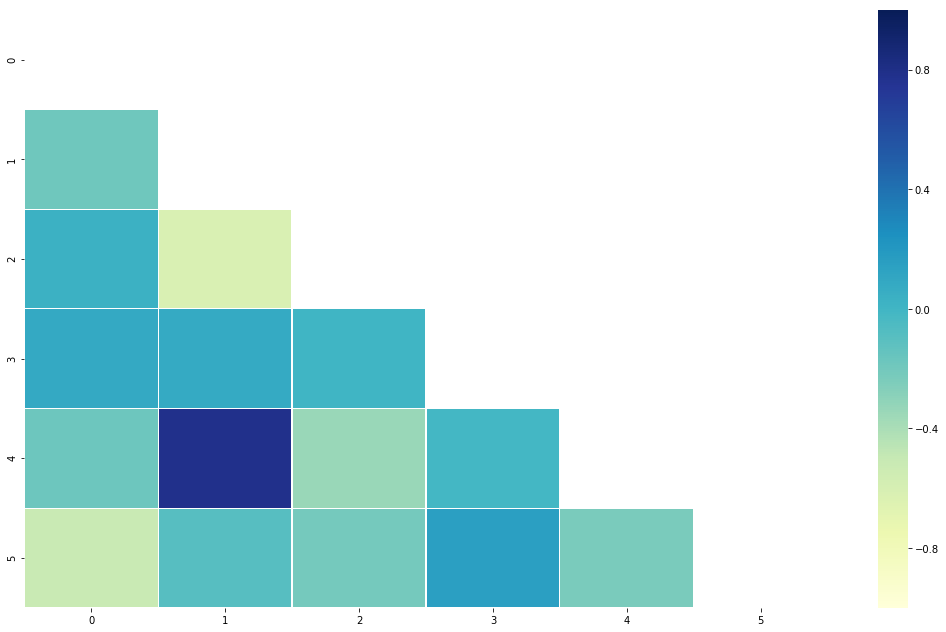

In [60]:
corr_of_dataset = np.array(dataset.corr())

plt.figure(figsize=(18,11)) 
mask = np.zeros_like(corr_of_dataset) 
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask) 
plt.savefig('heat_corr.png', bbox_inches='tight')

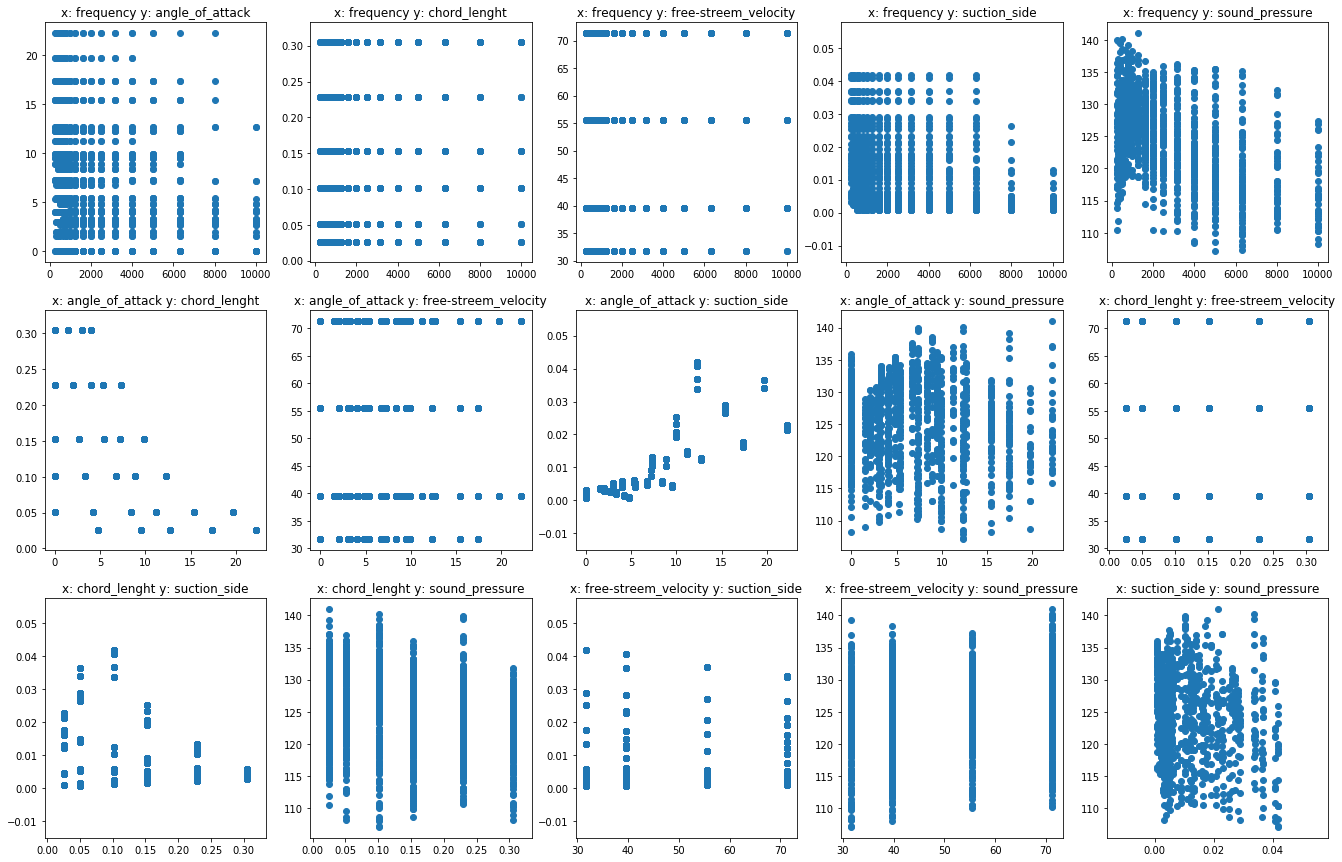

In [16]:
atr_to_scatter = [[inputs_indx[0], inputs_indx[1]], [inputs_indx[0], inputs_indx[2]],\
                  [inputs_indx[0], inputs_indx[3]],[inputs_indx[0], inputs_indx[4]],\
                  [inputs_indx[0], label_indx[0]], [inputs_indx[1], inputs_indx[2]],\
                  [inputs_indx[1], inputs_indx[3]], [inputs_indx[1], inputs_indx[4]], [inputs_indx[1], label_indx[0]],\
                  [inputs_indx[2], inputs_indx[3]], [inputs_indx[2], inputs_indx[4]], [inputs_indx[2], label_indx[0]],\
                  [inputs_indx[3], inputs_indx[4]],[inputs_indx[3], label_indx[0]], [inputs_indx[4], label_indx[0]]] 
plt.figure(figsize=(23, 15)) 
for i in range(len(atr_to_scatter)): 
    plt.subplot(3, 5, i+1) 
    plt.scatter(dataset[atr_to_scatter[i][0]], dataset[atr_to_scatter[i][1]]) 
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1])) 
    plt.savefig('scatter_diag.png', bbox_inches='tight')

In [17]:
dataset.corr()

,frequency,angle_of_attack,chord_lenght,free-streem_velocity,suction_side,sound_pressure
frequency,1.000000,-0.187432,0.040405,0.089439,-0.174288,-0.509833
angle_of_attack,-0.187432,1.000000,-0.616654,0.080989,0.787277,-0.089155
chord_lenght,0.040405,-0.616654,1.000000,0.006479,-0.338301,-0.207299
free-streem_velocity,0.089439,0.080989,0.006479,1.000000,-0.009081,0.149998
suction_side,-0.174288,0.787277,-0.338301,-0.009081,1.000000,-0.231721
sound_pressure,-0.509833,-0.089155,-0.207299,0.149998,-0.231721,1.000000


1307
__________


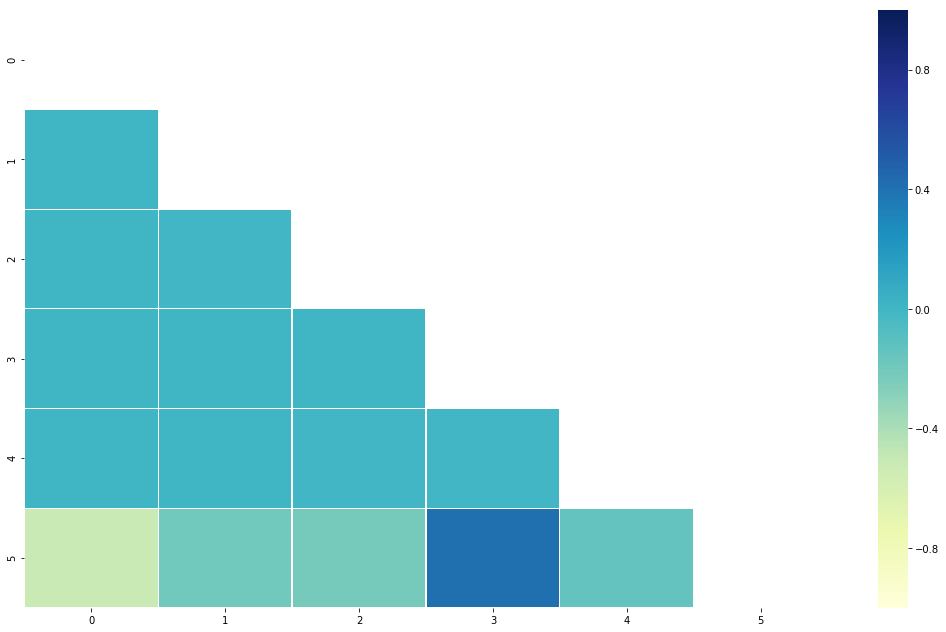

In [18]:


dataset1=dataset.drop(columns=['sound_pressure'])
pca = PCA(n_components = 5)
dataset1 = pca.fit_transform(dataset1)
print(len(dataset1))
dataset1=dataset1.transpose()
dataset_new=dataset.copy()
dataset_new[inputs_indx[0]]=dataset1[0]
dataset_new[inputs_indx[1]]=dataset1[1]
dataset_new[inputs_indx[2]]=dataset1[2]
dataset_new[inputs_indx[3]]=dataset1[3]
dataset_new[inputs_indx[4]]=dataset1[4]


corr_of_dataset = np.array(dataset_new.corr())

plt.figure(figsize=(18,11)) 
mask = np.zeros_like(corr_of_dataset) 
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask) 
print("__________")


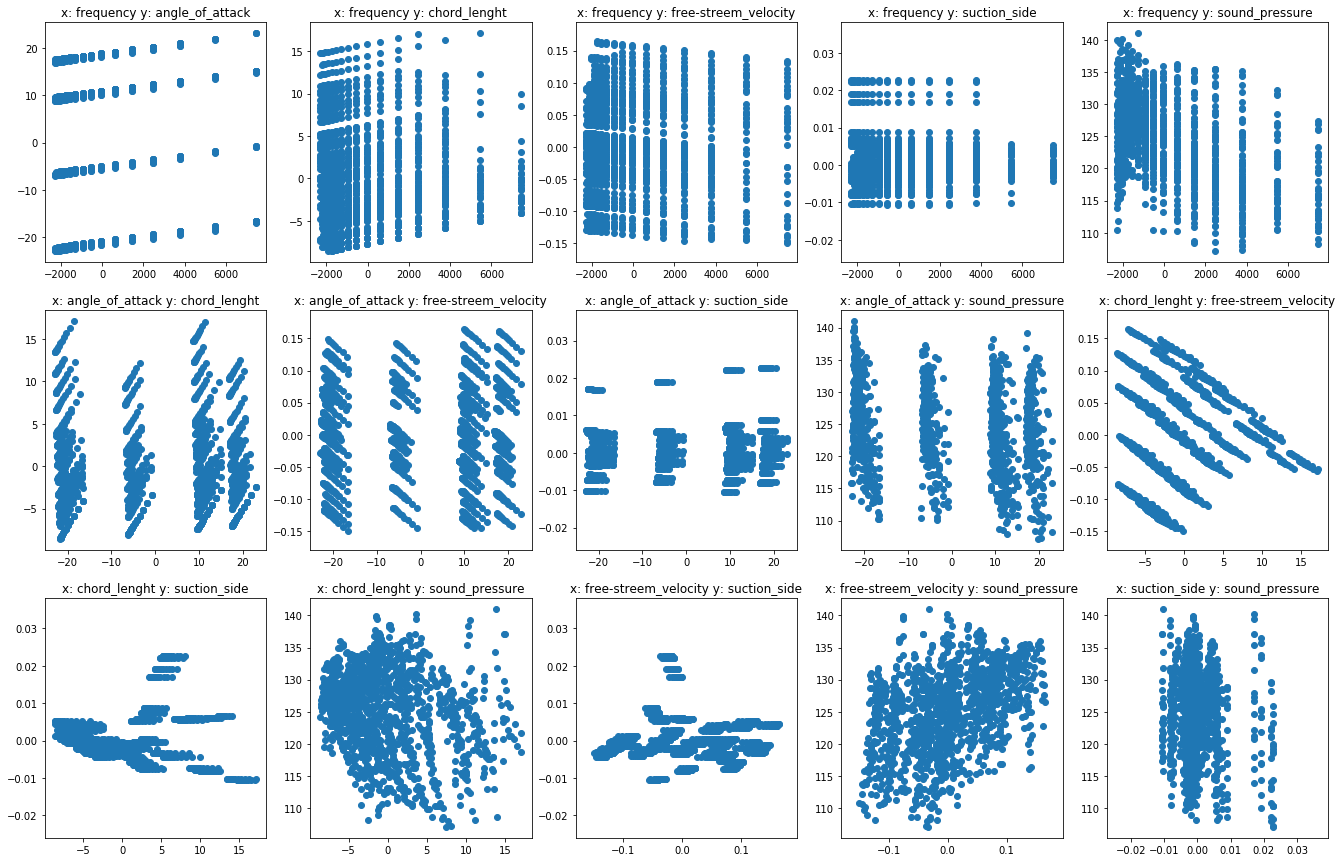

In [19]:
atr_to_scatter = [[inputs_indx[0], inputs_indx[1]], [inputs_indx[0], inputs_indx[2]],\
                  [inputs_indx[0], inputs_indx[3]],[inputs_indx[0], inputs_indx[4]],\
                  [inputs_indx[0], label_indx[0]], [inputs_indx[1], inputs_indx[2]],\
                  [inputs_indx[1], inputs_indx[3]], [inputs_indx[1], inputs_indx[4]], [inputs_indx[1], label_indx[0]],\
                  [inputs_indx[2], inputs_indx[3]], [inputs_indx[2], inputs_indx[4]], [inputs_indx[2], label_indx[0]],\
                  [inputs_indx[3], inputs_indx[4]],[inputs_indx[3], label_indx[0]], [inputs_indx[4], label_indx[0]]] 
plt.figure(figsize=(23, 15)) 
for i in range(len(atr_to_scatter)): 
    plt.subplot(3, 5, i+1) 
    plt.scatter(dataset_new[atr_to_scatter[i][0]], dataset_new[atr_to_scatter[i][1]]) 
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1])) 
    plt.savefig('scatter_diag.png', bbox_inches='tight')

In [20]:
#dataset1=dataset.drop(columns=['PE'])
#pca = PCA(n_components = 2)
#dataset1 = pca.fit_transform(dataset1)
#print(len(dataset1))
#dataset1=dataset1.transpose()
#dataset_new=dataset.drop(columns=['AP', 'RH'])
#dataset_new['AT']=dataset1[0]
#dataset_new['V']=dataset1[1]
#dataset_new=dataset_new.rename(index=str, columns={"AT": "first", "V": "second"})
#dataset_new

In [21]:
scaler = preprocessing.StandardScaler() 
dataset_new.loc[:, inputs_indx] = scaler.fit_transform(dataset_new.loc[:, inputs_indx]) 
dataset_new.loc[:, label_indx] = scaler.fit_transform(dataset_new.loc[:, label_indx]) 



1307


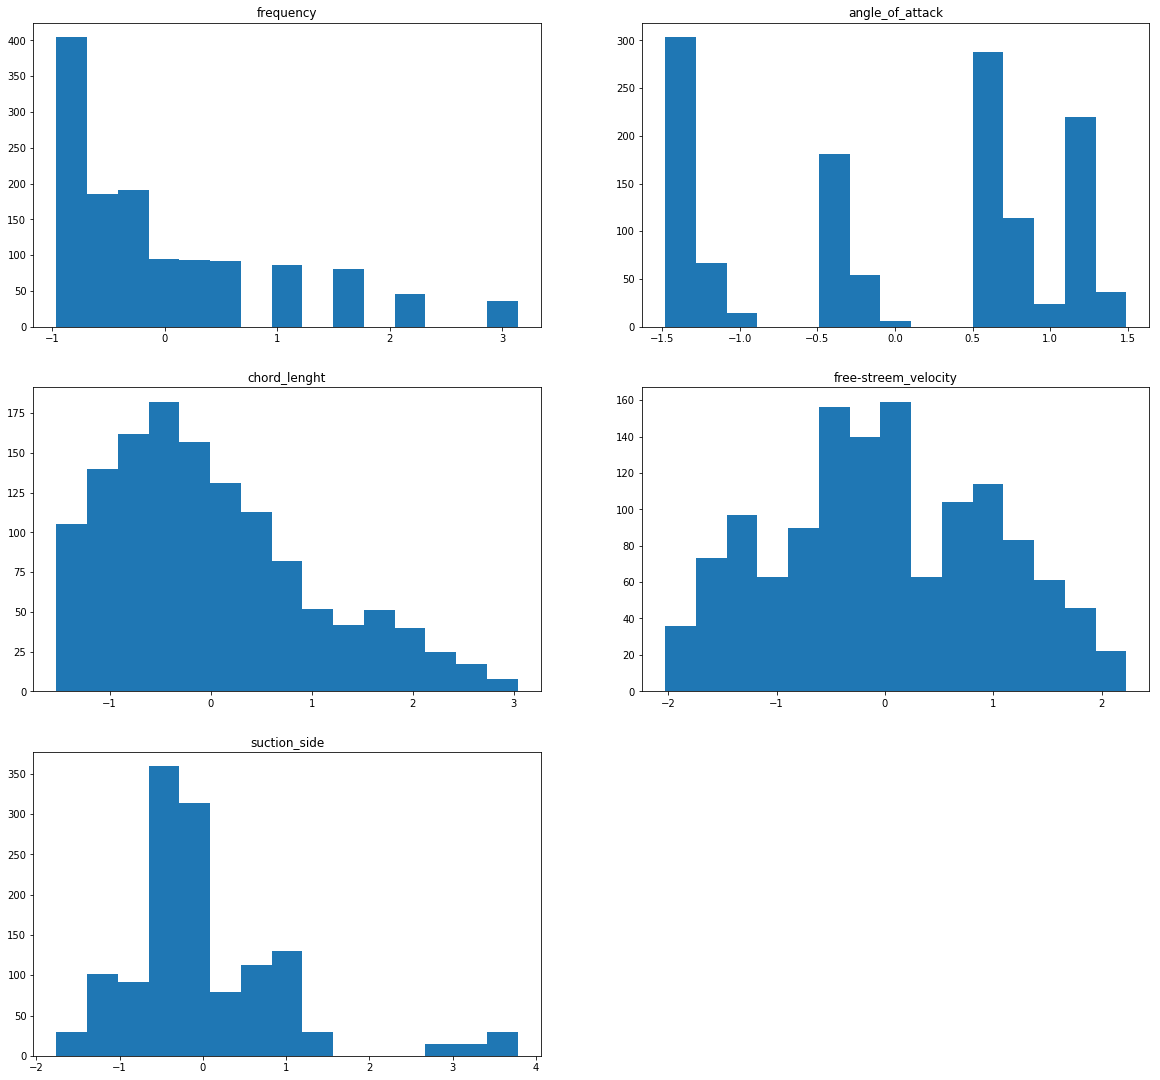

In [22]:
print(len(dataset_new))
plt.figure(figsize = (20, 19))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.hist(dataset_new[inputs_indx[i]], bins = 15)
    plt.title(inputs_indx[i])
plt.savefig('hist1.png', bbox_inches='tight')    

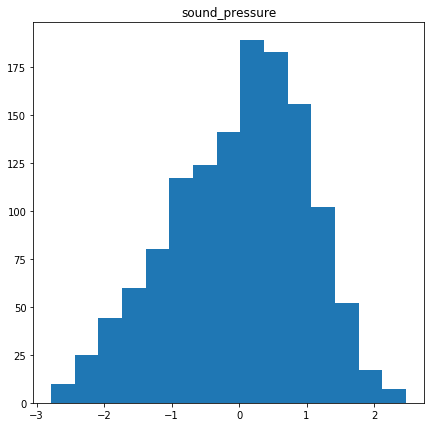

In [23]:
plt.figure(figsize = (7, 7))
plt.hist(dataset_new[label_indx[0]], bins = 15)
plt.title(label_indx[0])
plt.savefig('hist2.png', bbox_inches='tight')

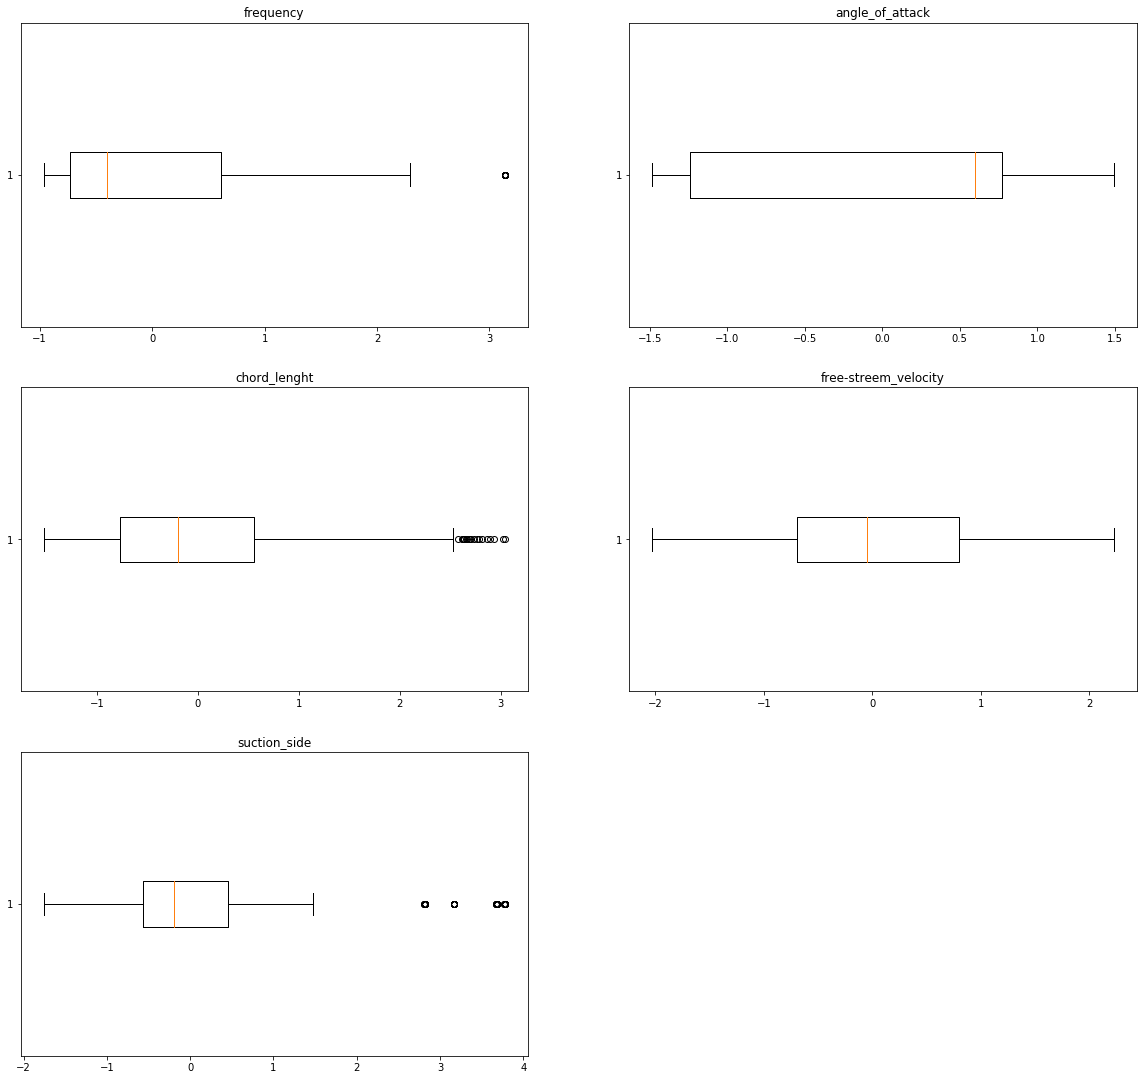

In [24]:
plt.figure(figsize = (20, 19))
for i in range(5):
    plt.subplot(3, 2, i+1)
    plt.boxplot(dataset_new[inputs_indx[i]], vert=False)
    plt.title(inputs_indx[i])
plt.savefig('box1.png', bbox_inches='tight')

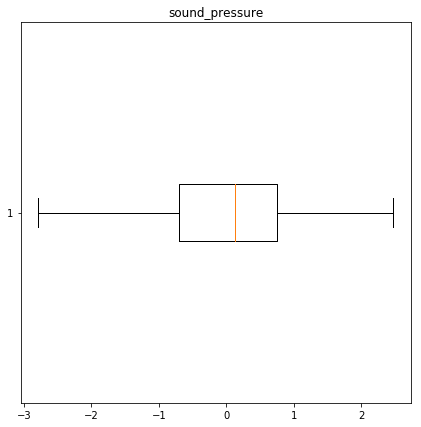

In [25]:
plt.figure(figsize = (7, 7))
plt.boxplot(dataset_new[label_indx[0]], vert=False)
plt.title(label_indx[0])
plt.savefig('box2.png', bbox_inches='tight')

KeyError: 'frequency'

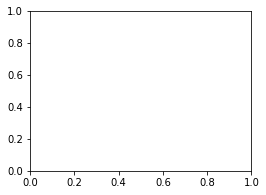

In [61]:
atr_to_scatter = [[inputs_indx[0], inputs_indx[1]], [inputs_indx[0], inputs_indx[2]],\
                  [inputs_indx[0], inputs_indx[3]],[inputs_indx[0], inputs_indx[4]],\
                  [inputs_indx[0], label_indx[0]], [inputs_indx[1], inputs_indx[2]],\
                  [inputs_indx[1], inputs_indx[3]], [inputs_indx[1], inputs_indx[4]], [inputs_indx[1], label_indx[0]],\
                  [inputs_indx[2], inputs_indx[3]], [inputs_indx[2], inputs_indx[4]], [inputs_indx[2], label_indx[0]],\
                  [inputs_indx[3], inputs_indx[4]],[inputs_indx[3], label_indx[0]], [inputs_indx[4], label_indx[0]]] 
plt.figure(figsize=(23, 10)) 
for i in range(len(atr_to_scatter)): 
    plt.subplot(3, 5, i+1) 
    plt.scatter(dataset_new[atr_to_scatter[i][0]], dataset_new[atr_to_scatter[i][1]]) 
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1])) 
    plt.savefig('scatter_diag.png', bbox_inches='tight')

In [63]:
array=dataset_new.values
X = array[:,0:5]

Y = array[:,5]

model = ExtraTreesRegressor()

model.fit(X, Y)

print(model.feature_importances_)

IndexError: index 5 is out of bounds for axis 1 with size 3

In [33]:
dataset_new=dataset_new.drop(columns=['angle_of_attack', 'chord_lenght', 'suction_side'])
dataset_new

KeyError: "labels ['angle_of_attack' 'chord_lenght' 'suction_side'] not contained in axis"

In [29]:
dataset_new=pd.DataFrame(np.array(dataset_new))
data = np.array(list(zip(dataset_new[0], dataset_new[1], dataset_new[2])))

train_border = [0, int(len(data)*0.6)]
valid_border = [int(len(data)*0.6), int(len(data)*0.9)]
test_border = [int(len(data)*0.9), len(data)]

train_data = data[train_border[0]: train_border[1]]
valid_data = data[valid_border[0]: valid_border[1]]
test_data = data[test_border[0]: test_border[1]]

print('\n', len(train_data), len(valid_data), len(test_data))
train_data=pd.DataFrame(np.array(train_data))
valid_data=pd.DataFrame(np.array(valid_data))
test_data=pd.DataFrame(np.array(test_data))
valid_data.info()



 784 392 131
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 3 columns):
0    392 non-null float64
1    392 non-null float64
2    392 non-null float64
dtypes: float64(3)
memory usage: 9.3 KB


In [30]:
#Поделил данные
#train_data.to_csv("learn_data.csv")
#valid_data.to_csv("valid_data.csv")
#test_data.to_csv("test_data.csv")
#dataset_new.to_csv("all_data.csv")